Credit card fraud detection - task 2 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
fraud_train_df = pd.read_csv("credit-card-dataset/fraudTest.csv")
fraud_test_df = pd.read_csv("credit-card-dataset/fraudTrain.csv")
fraud_train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
fraud_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
print(f"Null Values : {fraud_train_df.isnull().sum().sum()}")

Null Values : 0


In [8]:
# Removing Unnamed: 0 Columns
fraud_train_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_test_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
fraud_train_df["is_fraud"].value_counts()


is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [10]:
fraud_train_df["dob"] = pd.to_datetime(fraud_train_df["dob"])
fraud_train_df['trans_date_trans_time'] = pd.to_datetime(fraud_train_df['trans_date_trans_time'])

Exploratory Data Analysis

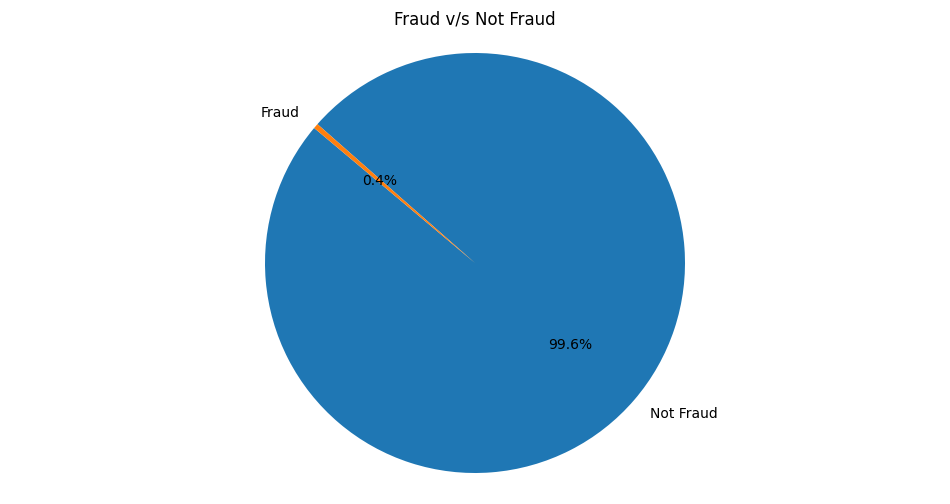

In [11]:
plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values = fraud_train_df.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 140)
plt.title("Fraud v/s Not Fraud")
plt.axis("equal")
plt.show()

In [12]:
fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts()

job
Science writer                 30
Licensed conveyancer           29
Systems developer              29
Engineer, biomedical           28
Colour technologist            27
                               ..
Video editor                    4
Public relations officer        3
Clinical research associate     3
Commercial horticulturist       3
Pilot, airline                  2
Name: count, Length: 177, dtype: int64

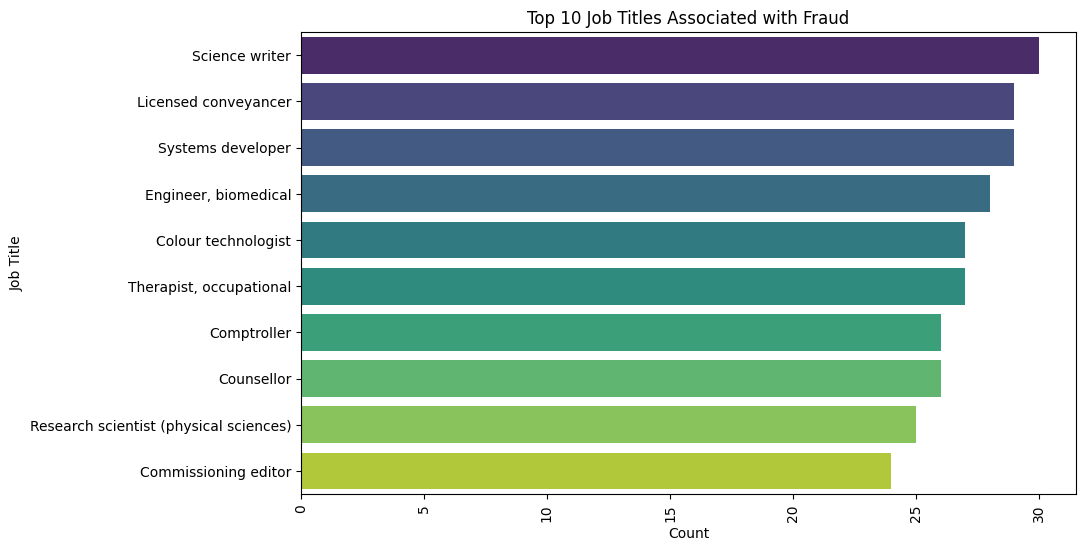

In [13]:
fraud_job_title = fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts().head(10)

fraud_job_title_df = fraud_job_title.reset_index()
fraud_job_title_df.columns = ['job', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_job_title_df, x="count", y="job",palette="viridis",dodge=False)
plt.title('Top 10 Job Titles Associated with Fraud')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.xticks(rotation=90)
plt.show()

In [14]:
fraud_train_df["category"].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

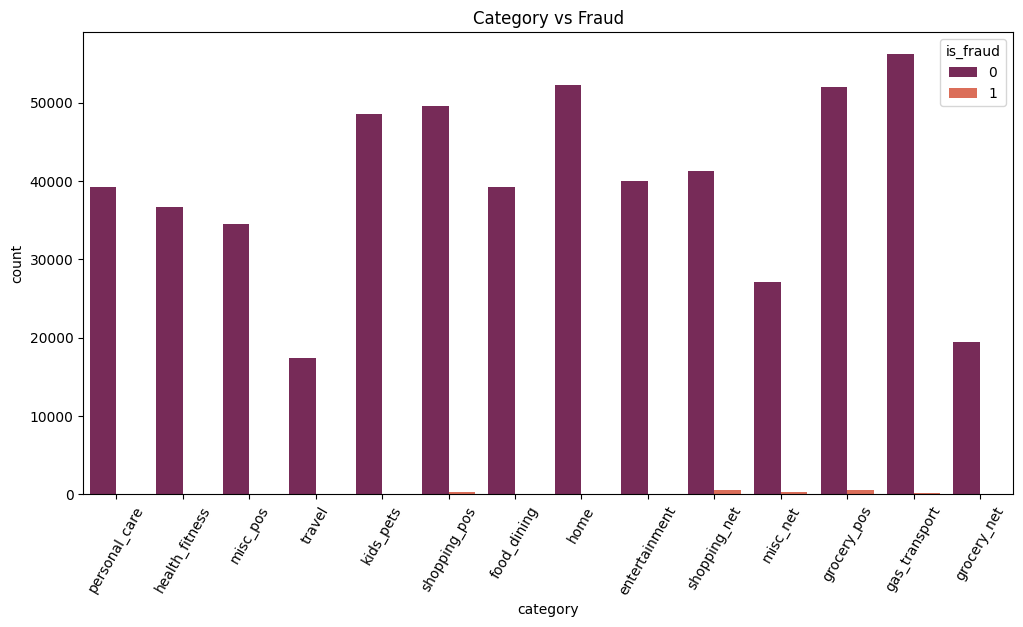

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(x = "category",hue = "is_fraud",data = fraud_train_df,palette = "rocket")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

Category VS Fraud plot

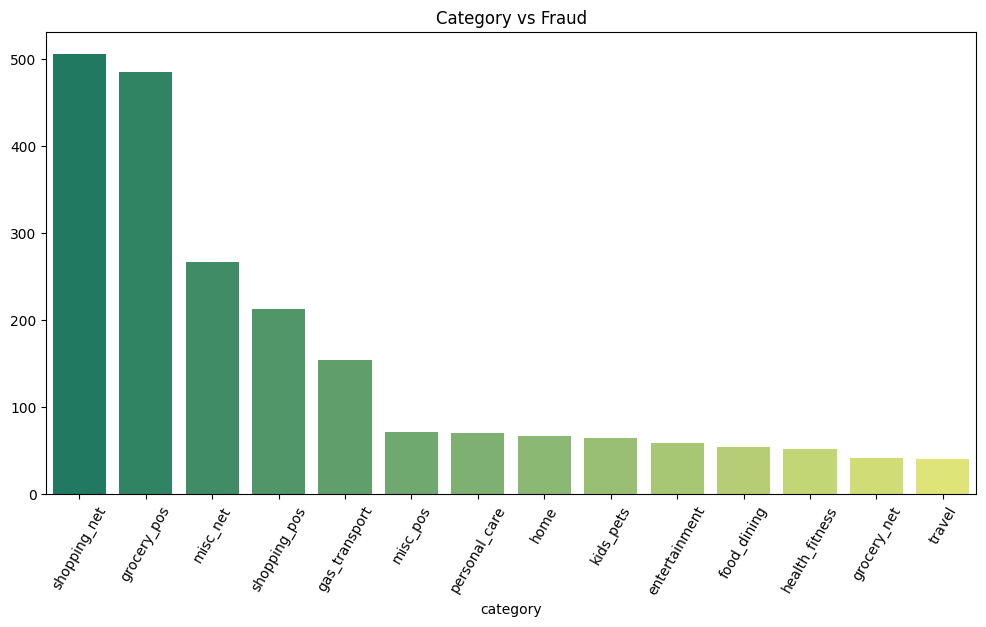

In [19]:
plt.figure(figsize = (12,6))
fraud_category = fraud_train_df[fraud_train_df["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "summer")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

In [20]:
fraud_train_df["city"].value_counts()


city
Birmingham     2423
Meridian       2229
Phoenix        2222
Utica          2204
San Antonio    2182
               ... 
Senatobia        10
Seattle           9
Guthrie           9
Rice              8
Wever             6
Name: count, Length: 849, dtype: int64

Distribution of transaction amounts

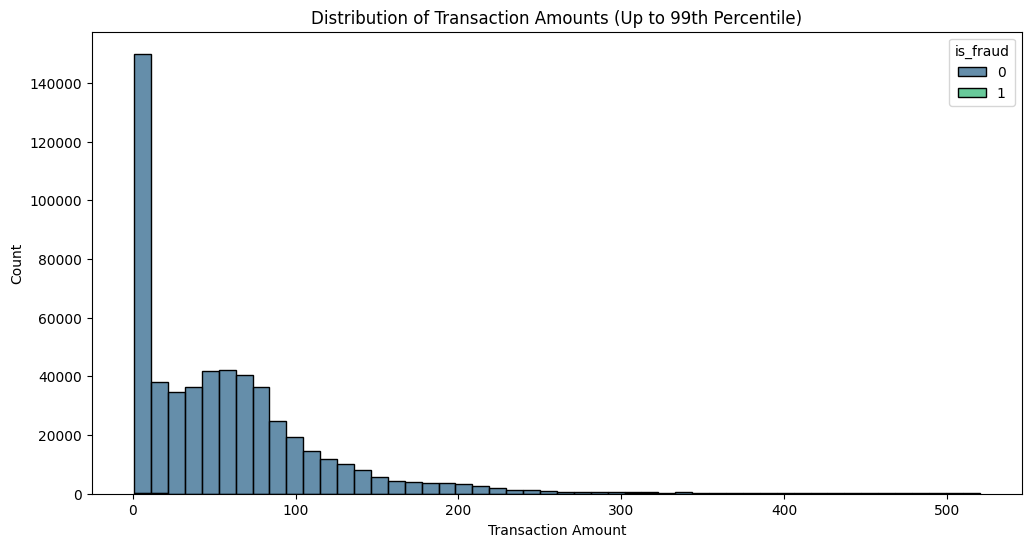

In [21]:
# Calculate the 99th percentile for the 'amt' column
amt_99 = fraud_train_df['amt'].quantile(0.99)
plt.figure(figsize=(12, 6))
sns.histplot(data=fraud_train_df[fraud_train_df['amt'] <= amt_99], x="amt", hue="is_fraud", multiple="stack", bins=50, palette="viridis")
plt.title('Distribution of Transaction Amounts (Up to 99th Percentile)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

Fraud Rate by State

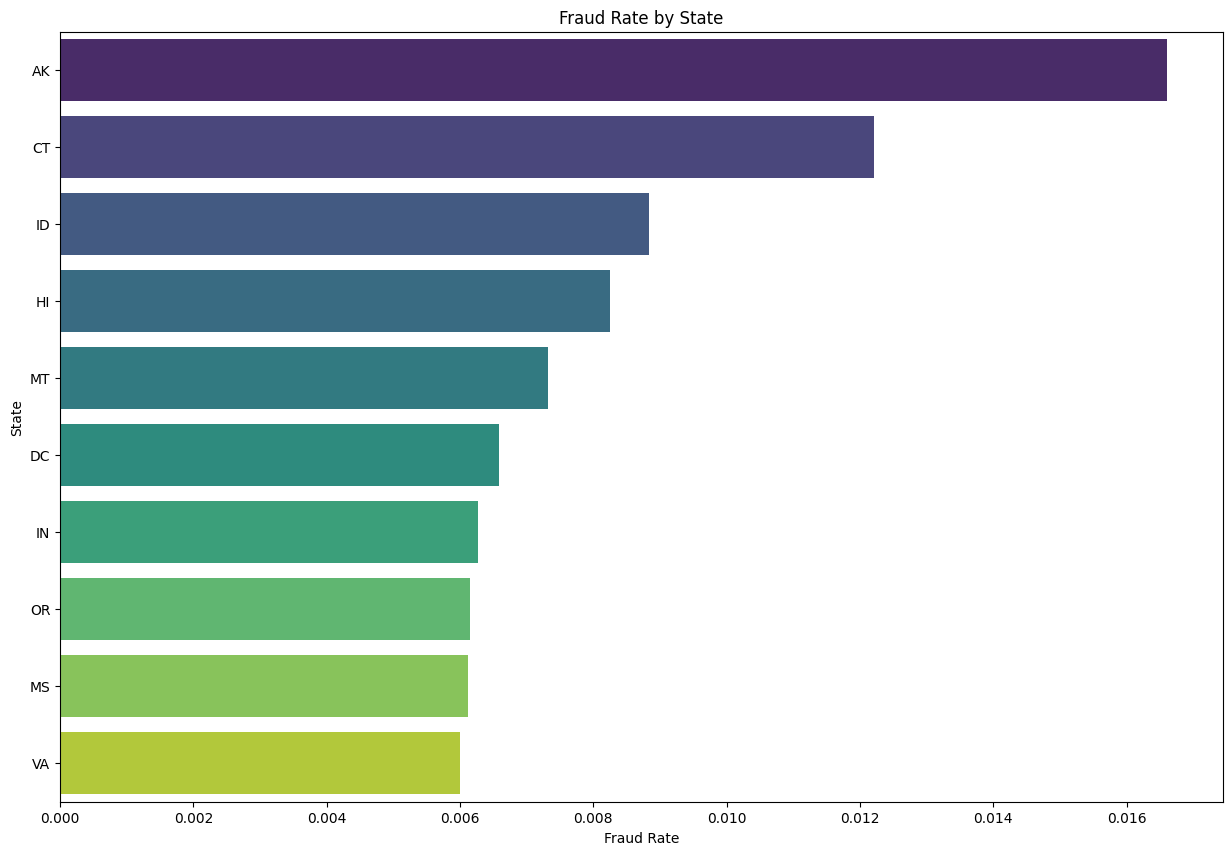

In [22]:
fraud_rate_by_state = fraud_train_df.groupby('state')['is_fraud'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(data=fraud_rate_by_state, x='is_fraud', y='state', palette='viridis')
plt.title('Fraud Rate by State')
plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.show()

Transactions Over Time

In [23]:
fraud_train_df.trans_date_trans_time.head()

0   2020-06-21 12:14:25
1   2020-06-21 12:14:33
2   2020-06-21 12:14:53
3   2020-06-21 12:15:15
4   2020-06-21 12:15:17
Name: trans_date_trans_time, dtype: datetime64[ns]

In [24]:
fraud_train_df.set_index('trans_date_trans_time', inplace=True)

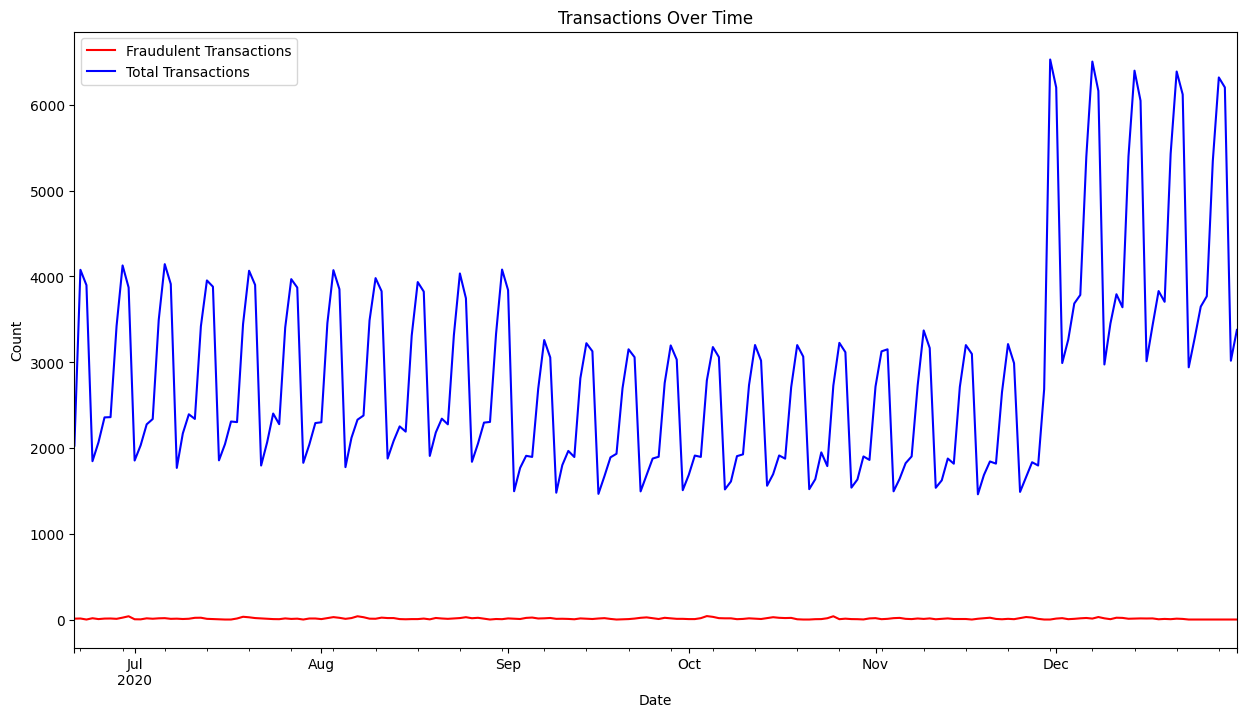

In [25]:
plt.figure(figsize=(15, 8))
fraud_train_df.resample('D')['is_fraud'].sum().plot(label='Fraudulent Transactions', color='red')
fraud_train_df.resample('D')['is_fraud'].count().plot(label='Total Transactions', color='blue')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


Fraudulent Transaction Locations

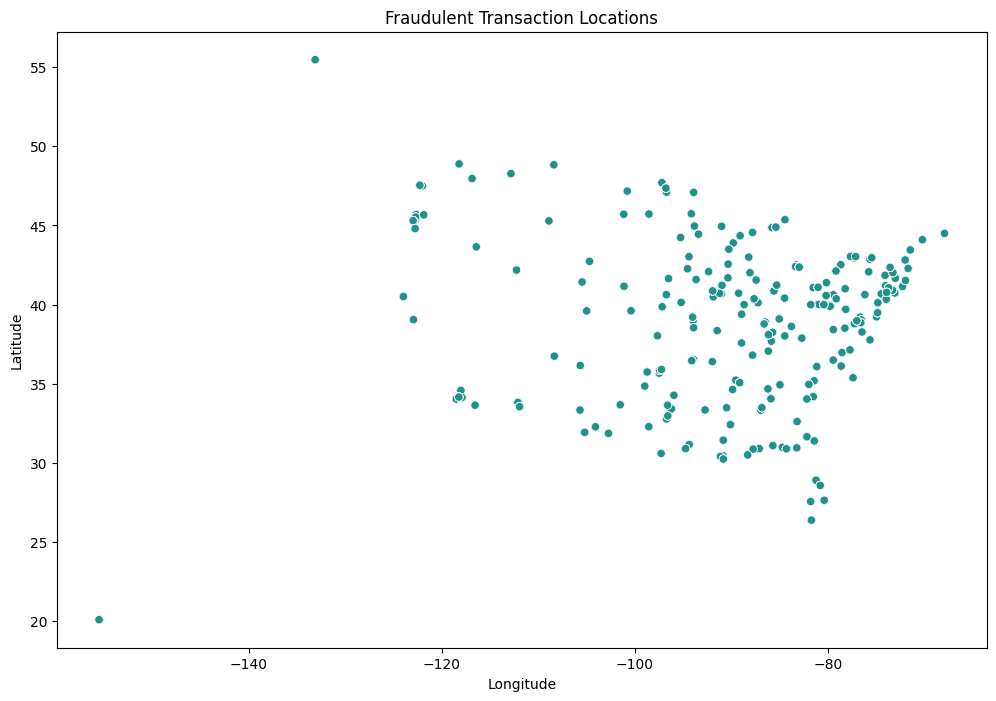

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fraud_train_df[fraud_train_df['is_fraud'] == 1], x='long', y='lat', hue='is_fraud', palette='viridis', legend=False)
plt.title('Fraudulent Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Using KMeans to add location_cluster column

In [27]:
coords = fraud_train_df[['lat', 'long']]
merch_coords = fraud_train_df[['merch_lat', 'merch_long']]
coords1 = fraud_test_df[['lat', 'long']]
merch_coords1 = fraud_test_df[['merch_lat', 'merch_long']]

# Fit the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
kmeans_m = KMeans(n_clusters = 7,random_state = 42).fit(merch_coords)
kmeans1 = KMeans(n_clusters=10, random_state=42).fit(coords1)
kmeans_m1 = KMeans(n_clusters = 7,random_state = 42).fit(merch_coords1)

fraud_train_df['location_cluster'] = kmeans.labels_
fraud_train_df['location_cluster_merch'] = kmeans_m.labels_
fraud_test_df['location_cluster'] = kmeans1.labels_
fraud_test_df['location_cluster_merch'] = kmeans_m1.labels_

c:\Users\adalh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adalh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adalh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adalh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [28]:
fraud_train_df.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)
fraud_test_df.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)
categorical_col = ['job','category','merchant','gender']
numerical_col = ['amt','location_cluster','location_cluster_merch','unix_time','city_pop']
categorical_col , numerical_col

(['job', 'category', 'merchant', 'gender'],
 ['amt',
  'location_cluster',
  'location_cluster_merch',
  'unix_time',
  'city_pop'])

In [30]:
encoder = LabelEncoder()
for col in categorical_col:
  fraud_train_df[col] = encoder.fit_transform(fraud_train_df[col])
  fraud_test_df[col] = encoder.fit_transform(fraud_test_df[col])

input_col = numerical_col + categorical_col
target_col = 'is_fraud'

scaler = StandardScaler()
fraud_train_df[input_col] = scaler.fit_transform(fraud_train_df[input_col])
fraud_test_df[input_col] = scaler.fit_transform(fraud_test_df[input_col])

X = fraud_train_df[input_col]
X_test = fraud_test_df[input_col]
y = fraud_train_df[target_col]
y_test = fraud_test_df[target_col]

model_svc = SVC()
model_svc.fit(X, y)

model_rfc = RandomForestClassifier(random_state = 42,n_estimators = 10,n_jobs = -1,max_depth = 20)
model_rfc.fit(X, y)

model_svc.score(X, y)

y_pred_rfc = model_rfc.predict(X)
accuracy_score(y,y_pred_rfc)

y_pred = model_svc.predict(X_test)
y_pred

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9944959222627104